In [70]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [71]:
def am_valid_part(a,N):
    cff = int(N / 2)
    M = a.shape
    if len(M) == 3:
        return a[cff: M[0] - cff, cff: M[1] - cff, :]
    return a[cff: M[0] - cff, cff: M[1] - cff]

time_interval = 2.5 # seconds
pixel_side_len = 5 # cm

In [72]:
frame_1 = cv2.imread("./CS4243_2023_images_small/fr11.png", 0)
frame_2 = cv2.imread("./CS4243_2023_images_small/fr12.png", 0)

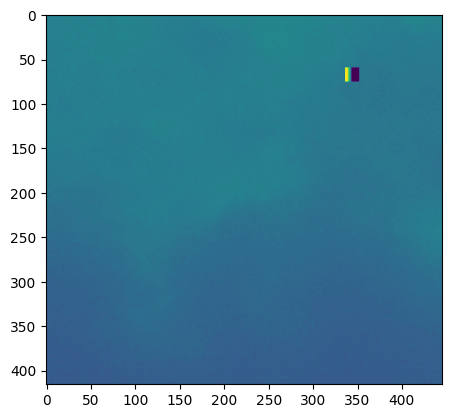

In [73]:
plt.imshow(frame_1)

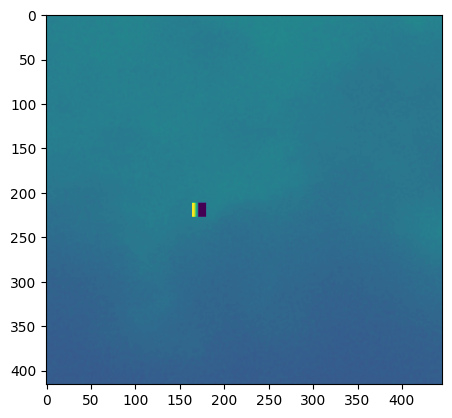

In [74]:
plt.imshow(frame_2)

Number of pixels on strongest edge:  64


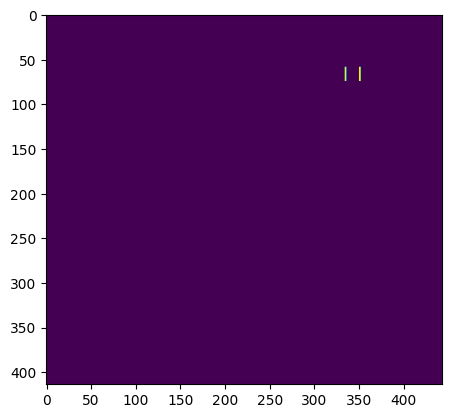

In [75]:
hsx = np.array([[-1 , 0 , 1] , [-2 , 0 , 2] , [-1 , 0 , 1]])
vert_edge_frame_1 = am_valid_part(cv2.filter2D(frame_1, -1, hsx), 3)
strongest_vert_edge_frame_1 = vert_edge_frame_1 == vert_edge_frame_1.max()
print("Number of pixels on strongest edge: ", np.sum(strongest_vert_edge_frame_1))
plt.imshow(strongest_vert_edge_frame_1)

Number of pixels on strongest edge:  64


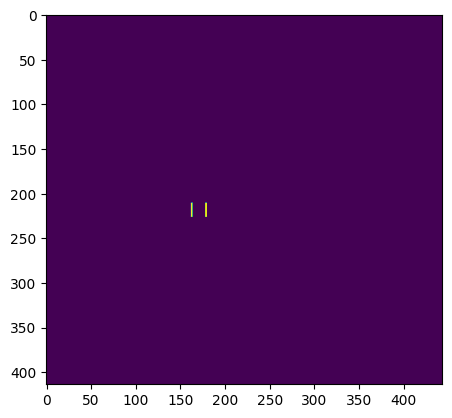

In [76]:
vert_edge_frame_2 = am_valid_part(cv2.filter2D(frame_2, -1, hsx), 3)
strongest_vert_edge_frame_2 = vert_edge_frame_2 == vert_edge_frame_2.max()
print("Number of pixels on strongest edge: ", np.sum(strongest_vert_edge_frame_2))
plt.imshow(strongest_vert_edge_frame_2)

In [77]:
max_value_edge_frame_1 = strongest_vert_edge_frame_1.max()
top_pixel_edge_frame_1 = np.asarray(np.unravel_index(
    strongest_vert_edge_frame_1.ravel().argmax(), 
    strongest_vert_edge_frame_1.shape
))

top_pixel_edge_frame_1

array([ 59, 334])

In [78]:
max_value_edge_frame_2 = strongest_vert_edge_frame_2.max()
top_pixel_edge_frame_2 = np.asarray(np.unravel_index(
    strongest_vert_edge_frame_2.ravel().argmax(), 
    strongest_vert_edge_frame_2.shape
))

top_pixel_edge_frame_2

array([211, 162])

In [79]:
displacement = top_pixel_edge_frame_2 - top_pixel_edge_frame_1
displacement

array([ 152, -172])

In [80]:
velocity_vector = displacement / time_interval
velocity_vector # pixels/second

array([ 60.8, -68.8])

In [81]:
speed_pixel_per_second = np.sqrt(velocity_vector[0] ** 2 + velocity_vector[1] ** 2)
speed_cm_per_second = speed_pixel_per_second * pixel_side_len
speed_m_per_second = speed_cm_per_second / 100

speed_m_per_second

4.5907733553291425

# Algorithm

In [82]:
def velocity(frame_one, frame_two, time_elapsed, pixel_size_cm):
    hsx = np.array([[-1 , 0 , 1] , [-2 , 0 , 2] , [-1 , 0 , 1]])
    vert_edge_one = am_valid_part(cv2.filter2D(frame_one, -1, hsx), 3)
    vert_edge_two = am_valid_part(cv2.filter2D(frame_two, -1, hsx), 3)
    max_edge_one = vert_edge_one == vert_edge_one.max()
    max_edge_two = vert_edge_two == vert_edge_two.max()
    top_pixel_edge_one = np.asarray(np.unravel_index(
        max_edge_one.ravel().argmax(), 
        max_edge_one.shape
    ))
    top_pixel_edge_two = np.asarray(np.unravel_index(
        max_edge_two.ravel().argmax(), 
        max_edge_two.shape
    ))
    displacement_meters = (top_pixel_edge_two - top_pixel_edge_one) * pixel_size_cm / 100
    velocity_meters_second = displacement_meters / time_elapsed
    return np.sqrt(velocity_meters_second[0] ** 2 + velocity_meters_second[1] ** 2)

In [83]:
velocity(frame_1, frame_2, time_interval, pixel_side_len)

4.590773355329143